In [1]:
from linemod_load import LineModDataset, ToTensor
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import glob
import cv2
import configparser
from pathlib import Path
config = configparser.ConfigParser()
config.read('./cfg/config.cfg')
lm_path = Path(config['Dataset']['lm'])
coco_path = Path(config['Dataset']['coco'])
print(f'lm_path: {lm_path}')
print(f'coco_path: {coco_path}')
# transform = transforms.Compose([ToTensor()])
lm_dataset_train = LineModDataset(root_dir=lm_path, background_dir=coco_path, task='train', object_number=9, augmentation=True, use_offline_data=False)#, transform=transform)
lm_dataset_test = LineModDataset(root_dir=lm_path, background_dir=coco_path, task='test', object_number=9, augmentation=False, use_offline_data=False)#, transform=transform)

lm_path: D:\ImageDataset\PoseDataset\lm_full
coco_path: D:\ImageDataset\coco\val2017


In [2]:
image_path = lm_path / 'train' / '000009' / 'rgb'
print(image_path.exists(), coco_path.exists())
total_path = []
total_path.append(sorted(image_path.glob('*')))
total_path.append(sorted(coco_path.glob('*')))
image_path2 = np.array(sorted(image_path.glob('*')))
coco_path2 = np.array(sorted(coco_path.glob('*')))
total_path = np.hstack((image_path2, coco_path2))
print(total_path[1000])
print(total_path[1000].stem)
# print(sorted(image_path.glob('*'))[0])
# total_path = np.array([sorted(image_path.glob('*')), sorted(coco_path.glob('*'))]).reshape(-1,1)
# print(total_path[0])

True True
D:\ImageDataset\PoseDataset\lm_full\train\000009\rgb\001000.png
001000


D:\ImageDataset\coco\val2017
5000
D:\ImageDataset\coco\val2017\000000235064.jpg
(480, 640, 3)


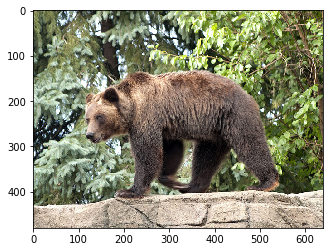

In [3]:
coco_dir = coco_path
backgrounds = glob.glob(str(coco_dir / '*'))
print(coco_dir)
print(len(backgrounds))
background = np.random.choice(backgrounds)
print(background)
img_bg = cv2.imread(background)[:,:,::-1]
print(img_bg.shape)
plt.imshow(img_bg)

time_elabsed for loading a set of image: 0.12695765495300293
(128, 128, 3)
image min max: (0.0, 0.9490196)
image_aug min max: (0.0, 1.0)
image_cropped min max: (0.0, 0.94509804)
mask_cropped min max: (0, 255)
pose: float32


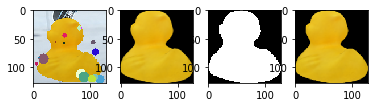

In [4]:
import time
start_time = time.time()
idx = np.random.choice(np.arange(len(lm_dataset_train)))
sample = lm_dataset_train[idx]
time_elapsed = time.time() - start_time
print(f'time_elabsed for loading a set of image: {time_elapsed}')
image = sample['image']
image_cropped = sample['image_cropped']
mask_cropped = sample['mask_cropped']
image_aug = sample['image_aug']
image_gt_cropped = sample['image_gt_cropped']
pose = sample['pose']
print(image_cropped.shape)
bbox = lm_dataset_train.bbox
print(f'image min max: {np.min(image), np.max(image)}')
print(f'image_aug min max: {np.min(image_aug), np.max(image_aug)}')
print(f'image_cropped min max: {np.min(image_cropped), np.max(image_cropped)}')
print(f'mask_cropped min max: {np.min(mask_cropped), np.max(mask_cropped)}')
# image_aug = lm_dataset_train.image_augmentation_random_circle(image_aug)
print(f'pose: {pose.dtype}')
plt.subplot(1,4,1)
plt.imshow(image_aug)
plt.subplot(1,4,2)
plt.imshow(image_cropped)
plt.subplot(1,4,3)
plt.imshow(mask_cropped, cmap='gray')
plt.subplot(1,4,4)
plt.imshow(image_gt_cropped)

time_elabsed for loading a set of image: 0.06833291053771973


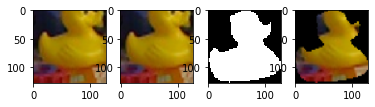

In [5]:
start_time = time.time()
idx = np.random.choice(np.arange(len(lm_dataset_test)))
idx = 82
sample = lm_dataset_test[idx]
time_elapsed = time.time() - start_time
print(f'time_elabsed for loading a set of image: {time_elapsed}')
image = sample['image']
image_cropped = sample['image_cropped']
mask_cropped = sample['mask_cropped']
image_aug = sample['image_aug']
image_gt_cropped = sample['image_gt_cropped']
pose = sample['pose']

# mask_idx = (mask_cropped > 0.0)
# mask_cropped = (mask_cropped*255).astype(np.uint8)
# print(np.min(mask_cropped), np.max(mask_cropped))
# print(mask_idx.shape)
# image_gt_cropped = cv2.bitwise_and(image_cropped, image_cropped, mask=mask_cropped)
# print(image_gt_cropped.shape)

plt.subplot(1,4,1)
plt.imshow(image_aug)
plt.subplot(1,4,2)
plt.imshow(image_cropped)
plt.subplot(1,4,3)
plt.imshow(mask_cropped, cmap='gray')
plt.subplot(1,4,4)
plt.imshow(image_gt_cropped)

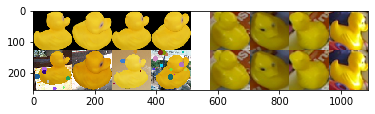

In [6]:
image_cropped_train = []
image_aug_train = []
image_cropped_test = []
image_aug_test = []
for _ in range(4):
    idx_train = np.random.choice(np.arange(len(lm_dataset_train)))
    idx_test = np.random.choice(np.arange(len(lm_dataset_test)))
    sample_train = lm_dataset_train[idx_train]
    sample_test = lm_dataset_test[idx_test]

    image_cropped_train.append(sample_train['image_cropped'])
    image_aug_train.append(sample_train['image_aug'])
    image_cropped_test.append(sample_test['image_cropped'])
    image_aug_test.append(sample_test['image_aug'])

image_cropped_train = np.array(image_cropped_train)
image_aug_train = np.array(image_aug_train)
image_cropped_test = np.array(image_cropped_test)
image_aug_test = np.array(image_aug_test)

image_cropped_train_concat = np.hstack((image_cropped_train[0],image_cropped_train[1],image_cropped_train[2],image_cropped_train[3]))
image_cropped_test_concat = np.hstack((image_cropped_test[0],image_cropped_test[1],image_cropped_test[2],image_cropped_test[3]))
void_gap = np.ones((128,64,3))
image_aug_train_concat = np.hstack((image_aug_train[0], image_aug_train[1], image_aug_train[2], image_aug_train[3]))
image_aug_test_concat = np.hstack((image_aug_test[0], image_aug_test[1], image_aug_test[2], image_aug_test[3]))

image_cropped_concat = np.hstack((image_cropped_train_concat, void_gap, image_cropped_test_concat))
image_aug_concat = np.hstack((image_aug_train_concat, void_gap, image_aug_test_concat))
total_concat = np.vstack((image_cropped_concat, image_aug_concat))

plt.imshow(total_concat)


In [7]:
import torch
import torch.nn.functional as F
import torch.nn as nn
x = torch.tensor(np.arange(4*3*10*10).reshape((4,3,10,10)).astype(np.float32))
y = torch.tensor(np.zeros((4,3,10,10)).astype(np.float32))
print(x.shape, y.shape)
def bootstrapped_l2_loss(x, y, bootstrap_factor=4):
    ''' The Bootstrapped L2 Loss which is only computed on the pixels with the largest errors. '''
    mseloss = nn.MSELoss(reduction='none')
    batch_loss = 0
    for i in range(len(x)): # compute MSE loss for each image
        loss = mseloss(x[i], y[i]).sum(dim=0) # x[i]: [c, h, w] --> sum along with dim=0: [h, w]
        worst_loss = loss.view(-1).sort()[0][-bootstrap_factor:]
        batch_loss += torch.mean(worst_loss)
    batch_loss /= len(x)
    return batch_loss
loss = bootstrapped_l2_loss(x, y)
print(loss)

torch.Size([4, 3, 10, 10]) torch.Size([4, 3, 10, 10])
tensor(1615272.5000)


In [8]:
color = np.random.rand(3)
# color = tuple([x for x in color])
print(tuple(color))

(0.23646701042945006, 0.7144272751438425, 0.3716532326281885)


(480, 640)
(134, 144)
(128, 128)


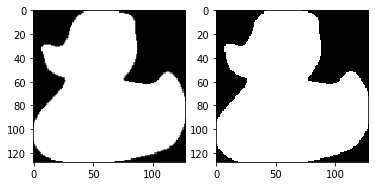

In [9]:
import json
from skimage import transform
mask_path = Path(lm_path / 'train' / '000009' / 'mask')
masks = glob.glob(str(mask_path / '*'))
with open(lm_path / 'train' / '000009' / 'scene_gt_info.json') as json_file:
    gt_json = json.load(json_file)  
def gt_bbox_load(gt_json):
    bbox = [] # bounding box vector in [N,4] shape
    for i in range(len(gt_json)):
        bbox.append(np.array(gt_json[str(i)][0]['bbox_obj']))        
    return np.array(bbox)
gt_bbox = gt_bbox_load(gt_json)
bbox = gt_bbox[1100]
y_min, x_min = bbox[0], bbox[1]
y_max, x_max = bbox[0]+bbox[2], bbox[1]+bbox[3]
mask = cv2.imread(masks[1100], flags=cv2.IMREAD_GRAYSCALE)
print(mask.shape)
mask_cropped = mask[x_min:x_max+1, y_min:y_max+1]
print(mask_cropped.shape)
mask = transform.resize(mask_cropped, (128,128), anti_aliasing=True)
print(mask.shape)
plt.subplot(1,2,1)
plt.imshow(mask, cmap='gray')
plt.subplot(1,2,2)
plt.imshow((mask>0.0).astype(int), cmap='gray')

In [23]:
from plyfile import PlyData, PlyElement
model_path = lm_path / 'models' / 'obj_000009.ply'
print(model_path)
model_data = PlyData.read(model_path)

D:\ImageDataset\PoseDataset\lm_full\models\obj_000009.ply


In [134]:
print(model_data['vertex'].count)
print(model_data['face'].count)
(x, y, z) = (np.array(model_data['vertex'][t]) for t in ('x', 'y', 'z'))
(r, g, b, a) = (np.array(model_data['vertex'][t])/255 for t in ('red', 'green', 'blue', 'alpha'))
colors = np.vstack((r,g,b,a)).transpose()
print(r[0], g[0], b[0], a[0])
print(colors.shape)
print(colors[0])

7912
15820
0.8745098039215686 0.7294117647058823 0.12941176470588237 1.0
(7912, 4)
[0.8745098  0.72941176 0.12941176 1.        ]


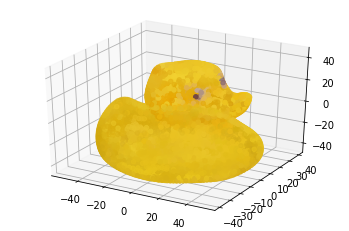

In [97]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=x,ys=y,zs=z, c=colors)

D:\ImageDataset\PoseDataset\lm_full\train\000009\scene_camera.json
D:\ImageDataset\PoseDataset\lm_full\train\000009\scene_gt.json
255.03123687776198 397.0369893982493
193.3362538480998 313.6497649562754
[371 244]
[0. 0. 0.]


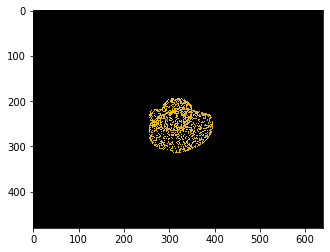

In [170]:
scene_camera_path = lm_path / 'train' / '000009' / 'scene_camera.json'
scene_gt_path = lm_path / 'train' / '000009' / 'scene_gt.json'
print(scene_camera_path)
print(scene_gt_path)
with open(scene_camera_path) as json_file:
    scene_camera = json.load(json_file)
with open(scene_gt_path) as json_file:
    scene_gt = json.load(json_file)
scene_number = '180'
cam_K = scene_camera[scene_number]['cam_K']
cam_R = scene_gt[scene_number][0]['cam_R_m2c']
cam_T = scene_gt[scene_number][0]['cam_t_m2c']
K = np.array(cam_K).reshape((3,3))
R = np.array(cam_R).reshape((3,3))
T = np.array(cam_T).reshape((3,1))
RT = np.hstack((R,T))

# x' = K*RT*X (3d to 2d projection from camera model),  X.shape: 4xN, x'.shape: 3xN
X = np.vstack((x,y,z, np.ones_like(x)))
x_2d = K@RT@X

x_2d /= x_2d[2] # for homogeneous representation (x,y,1)'
pix = x_2d[:2] # 2xN
print(np.min(pix[0]), np.max(pix[0]))
print(np.min(pix[1]), np.max(pix[1]))
num_pixels = pix.shape[1]
img = np.zeros((480,640,3))

print((pix[:,0]).astype(np.int32))
for i in range(num_pixels):
    x_idx, y_idx = pix[:,i].astype(np.int32)
    img[y_idx, x_idx, :] = colors[i, :-1]
plt.imshow(img)
print(img[0,0])